# DATA LOADING

In [2]:
%pip install mplcyberpunk
%pip install tqdm
%pip install seaborn
%pip install opencv-python-headless
%pip install pandas numpy
%pip install swifter
%pip install imblearn



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm

%matplotlib inline

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import os
import tqdm
# Initialize lists to hold file paths and labels
file_paths = []
labels = []

# Define a function to collect file paths and labels
def collect_image_paths_and_labels(base_dir, label):
    folderPath = os.path.join(base_dir, label)
    for filename in tqdm.tqdm(os.listdir(folderPath)): # Use tqdm.tqdm to create an iterator
        if filename.endswith(('jpg', 'jpeg', 'png')):  # Ensure correct file extensions
            file_paths.append(os.path.join(folderPath, filename))
            labels.append(label)

# Base directory for the dataset
base_path = 'C:/Users/davej/OneDrive/Desktop/ODL/'  # Update this to your dataset path

# Collect paths and labels for each class
class_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
for cls in class_labels:
    collect_image_paths_and_labels(os.path.join(base_path, 'Training'), cls)
    collect_image_paths_and_labels(os.path.join(base_path, 'Testing'), cls)

# Create a DataFrame
import pandas as pd # Import pandas for DataFrame creation
data = pd.DataFrame({'file_path': file_paths, 'label': labels})

# Save DataFrame to CSV
output_csv_path = 'C:/Users/davej/OneDrive/Desktop/ODL/brain_tumor_data.csv'  # Adjust path as necessary
data.to_csv(output_csv_path, index=False)

print("Data has been saved to CSV.")

# Data Visualization

In [ ]:
# Load the CSV file
data = pd.read_csv('C:/Users/Users/OneDrive/Desktop/ODL/brain_tumor_data.csv')

# Display the first few rows of the DataFrame
print(data.head())
print(f'Total records: {len(data)}')

                                           file_path         label
0  C:/Users/davej/OneDrive/Desktop/ODL/Training\g...  glioma_tumor
1  C:/Users/davej/OneDrive/Desktop/ODL/Training\g...  glioma_tumor
2  C:/Users/davej/OneDrive/Desktop/ODL/Training\g...  glioma_tumor
3  C:/Users/davej/OneDrive/Desktop/ODL/Training\g...  glioma_tumor
4  C:/Users/davej/OneDrive/Desktop/ODL/Training\g...  glioma_tumor
Total records: 3264


In [5]:
# Calculate the count for each label
label_counts = data['label'].value_counts()

# Print the count for each label
print("Number of instances for each class:")
total_count = 0
for label, count in label_counts.items():
    print(f"{label}: {count}")
    total_count += count

# Print the total count
print(f"Total: {total_count}")


Number of instances for each class:
meningioma_tumor: 937
glioma_tumor: 926
pituitary_tumor: 901
no_tumor: 500
Total: 3264


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mplcyberpunk  


# Activate the Cyberpunk theme
plt.style.use("cyberpunk")

# Define a color palette (you can skip this for cyberpunk if you want the default glowing effect)
palette = sns.color_palette("cool", len(data['label'].unique()))

# Sort the data by label counts in ascending order
sorted_data = data['label'].value_counts().sort_values().index
data['label'] = pd.Categorical(data['label'], categories=sorted_data, ordered=True)

# Plot the distribution of classes
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='label', data=data, palette=palette, order=sorted_data)

# Add percentage labels on top of bars
total = len(data['label'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='white')  # Cyberpunk uses a dark background, so white labels

# Add titles and labels
plt.title('Distribution of Brain Tumor Classes (with percentages)', fontsize=16, weight='bold', color='white')
plt.xlabel('Tumor Class', fontsize=12, weight='bold', color='white')
plt.ylabel('Count', fontsize=12, weight='bold', color='white')
plt.xticks(color='white')  # White x-axis labels
plt.yticks(color='white')  # White y-axis labels

# Add the "cyberpunk" glow effect
mplcyberpunk.add_glow_effects()

# Tight layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\davej\AppData\Local\Temp\ipykernel_21644\175640379.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=data, palette=palette, order=sorted_data)


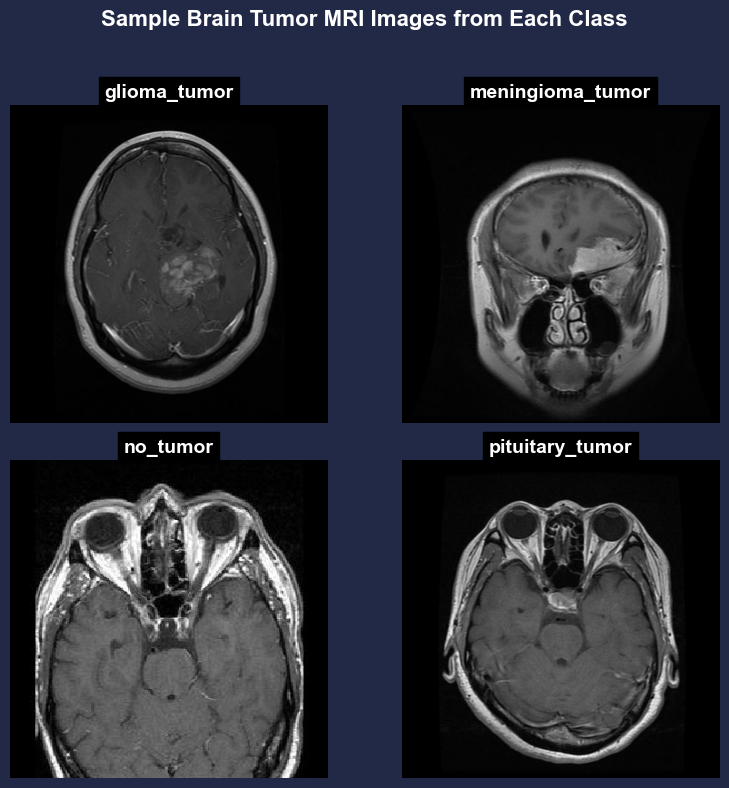

In [18]:
import matplotlib.pyplot as plt
import cv2

# Function to display images from each class with improved formatting
def display_sample_images(data, class_labels):
    plt.figure(figsize=(8, 8))  # Increased figure size for better visuals
    for i, label in enumerate(class_labels):
        sample_image_path = data[data['label'] == label]['file_path'].iloc[0]
        sample_image = cv2.imread(sample_image_path)
        sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
        
        plt.subplot(2, 2, i + 1)  # Adjusted to a 2x2 grid
        plt.imshow(sample_image)
        plt.title(label, fontsize=14, weight='bold', color='white', backgroundcolor='black') 
        plt.axis('off')  # Hide axes for cleaner look
    
    # Add a main title for the whole figure and adjust y-position
    plt.suptitle('Sample Brain Tumor MRI Images from Each Class', fontsize=16, weight='bold', color='White', y=0.98)
    
    # Use tight layout and give space for the title
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to make space for the main title
    plt.show()

# Display sample images
display_sample_images(data, ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'])


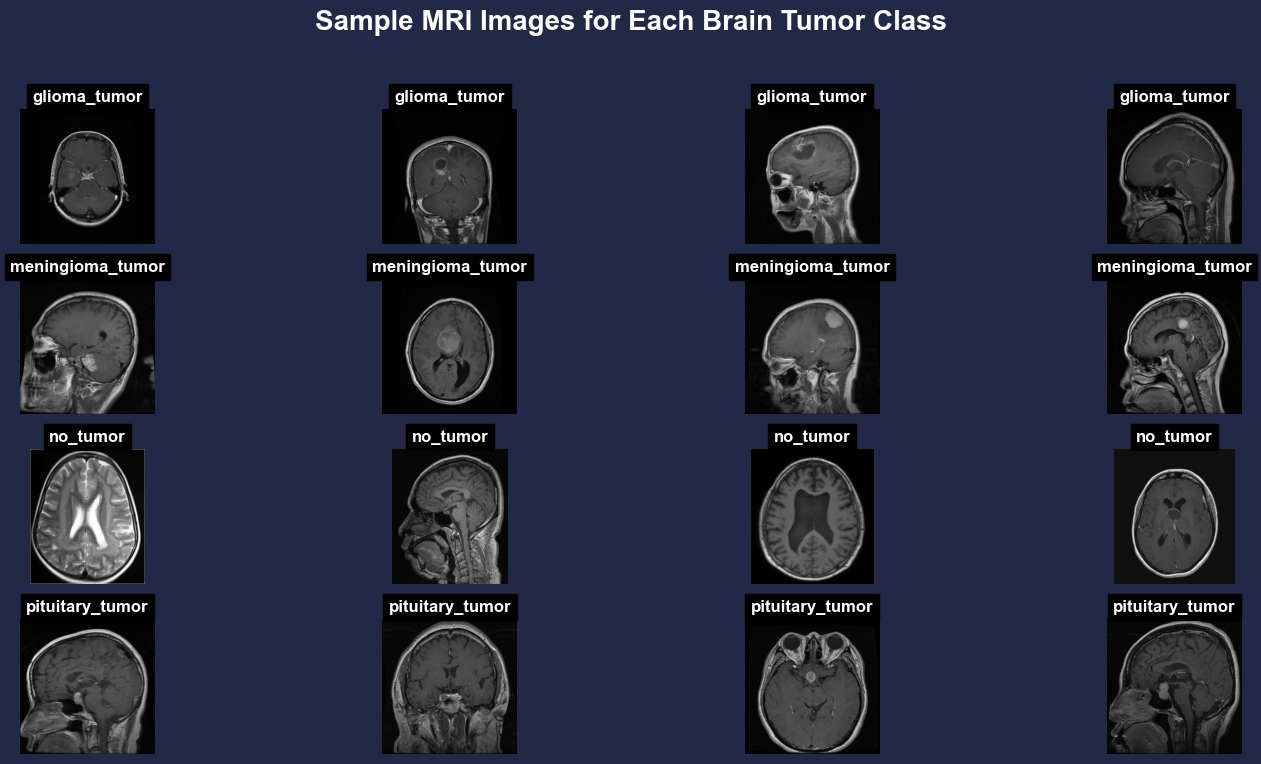

In [25]:
import matplotlib.pyplot as plt
import cv2

# Define class labels from your dataset
class_labels = data['label'].unique()

# Function to display multiple sample images from each class with enhancements
def display_multiple_images(data, class_labels):
    plt.figure(figsize=(16, 8))  # Larger figure size to accommodate more images
    for i, label in enumerate(class_labels):
        # Randomly sample 4 images from each class
        sample_images = data[data['label'] == label]['file_path'].sample(4)
        for j, file_path in enumerate(sample_images):
            sample_image = cv2.imread(file_path)
            sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
            # Adjust the subplot position and plot the images
            plt.subplot(len(class_labels), 4, i * 4 + j + 1)
            plt.imshow(sample_image)
            plt.title(label, fontsize=12, weight='bold', color='white', backgroundcolor='black')  # Improved title
            plt.axis('off')  # Remove axes for a cleaner look
    
    # Add a main title for the entire figure
    plt.suptitle('Sample MRI Images for Each Brain Tumor Class', fontsize=20, weight='bold', color='white', y=0.95)
    
    # Adjust layout to avoid overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.92])  # Adding space for the title
    plt.show()

# Display multiple sample images
display_multiple_images(data, class_labels)


In [31]:
# Calculate the count for each label and sort in ascending order
label_counts = data['label'].value_counts().sort_values()

# Extract class labels from the data
labels = label_counts.index.tolist()

# Plot the bar plot and sample images in one chart
plt.figure(figsize=(9, 7))

# Choose a Seaborn palette
colors = ["C0", "C1", "C2", "C3"]

# Plot the histogram with gradient colors
plt.subplot(2, 1, 1)
bars = plt.bar(label_counts.index, label_counts.values, color=colors)
mplcyberpunk.add_bar_gradient(bars=bars)
plt.xlabel('Labels', fontsize=14, color='white')
plt.xticks(ticks=range(len(labels)), labels=labels, fontsize=12, color='white')
plt.ylabel('Count', fontsize=14, color='black')
plt.title('Distribution of Labels', fontsize=16, color='white')

# Plot sample images from each label
for k, label in enumerate(labels):
    sample_image_path = data[data['label'] == label]['file_path'].iloc[0]
    sample_image = cv2.imread(sample_image_path)
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(2, 4, k + 5)
    ax.imshow(sample_image)
    ax.set_title(label, fontsize=12, color='white')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [34]:
from tqdm import tqdm
# Function to get image dimensions
def get_image_dimensions(file_path):
    image = cv2.imread(file_path)
    return image.shape

# Apply the function to get dimensions of all images with a progress bar
tqdm.pandas()  # Initialize tqdm for pandas
data['dimensions'] = data['file_path'].progress_apply(get_image_dimensions)

# Display the dimensions of the images
print(data['dimensions'].value_counts())


100%|█████████████████████████████████████████████████████████████████████████████| 3264/3264 [00:27<00:00, 118.09it/s]

dimensions
(512, 512, 3)    2341
(236, 236, 3)      79
(225, 225, 3)      43
(442, 442, 3)      22
(256, 256, 3)      18
                 ... 
(270, 250, 3)       1
(380, 336, 3)       1
(222, 212, 3)       1
(211, 219, 3)       1
(548, 538, 3)       1
Name: count, Length: 440, dtype: int64


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to categorize image sizes
def categorize_size(dimensions):
    height, width = dimensions[:2]
    if height <= 256 and width <= 256:
        return 'small'
    elif height <= 512 and width <= 512:
        return 'medium'
    else:
        return 'large'

# Apply the size categorization
data['size_category'] = data['dimensions'].apply(categorize_size)

# Group by class and size category
class_size_distribution = data.groupby(['label', 'size_category']).size().unstack().fillna(0)

# Plot class-wise size distribution using a grouped bar chart
plt.figure(figsize=(20, 12))

# Use a distinct color palette
palette = sns.color_palette("Set2", n_colors=3)

# Plot the grouped bar chart
ax = class_size_distribution.plot(kind='bar', figsize=(14, 8), width=0.7, color=palette)

# Add title and labels with larger font size
plt.title('Class-wise Size Distribution', fontsize=24, weight='bold')  # Increased font size for title
plt.xlabel('Class', fontsize=18)  # Larger font for x-axis label
plt.ylabel('Count', fontsize=18)  # Larger font for y-axis label
plt.xticks(rotation=45, fontsize=14)  # Larger font for x-axis ticks

# Increase font size of the legend and move it to a better position
plt.legend(title='Size Category', title_fontsize=16, fontsize=14, loc='upper right')

# Add data labels on top of each bar for better visibility
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=16)  # Increased font size for data labels

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\davej\AppData\Local\Temp\ipykernel_21644\3453858881.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_size_distribution = data.groupby(['label', 'size_category']).size().unstack().fillna(0)


<Figure size 2000x1200 with 0 Axes>

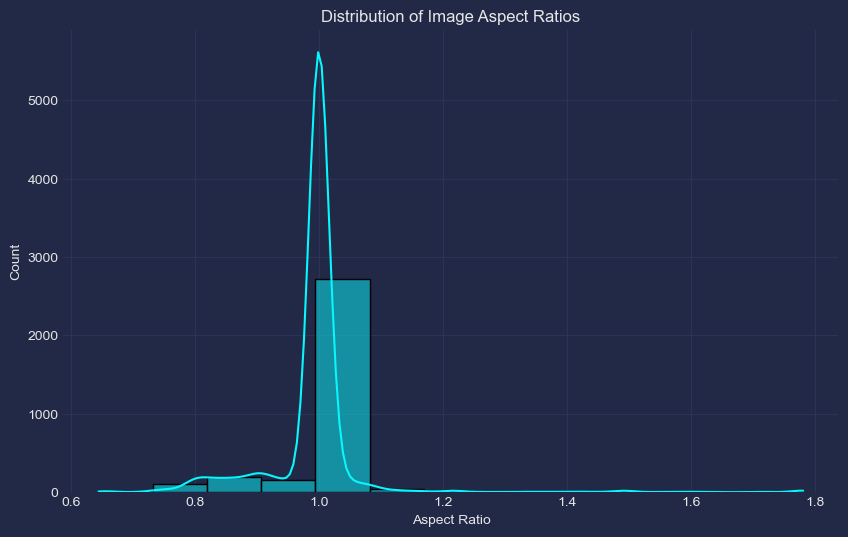

In [57]:
# Calculate aspect ratio
data['aspect_ratio'] = data['dimensions'].apply(lambda x: x[1] / x[0])

# Plot aspect ratio distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['aspect_ratio'], kde=True)
plt.title('Distribution of Image Aspect Ratios')
plt.xlabel('Aspect Ratio')
plt.ylabel('Count')
plt.show()


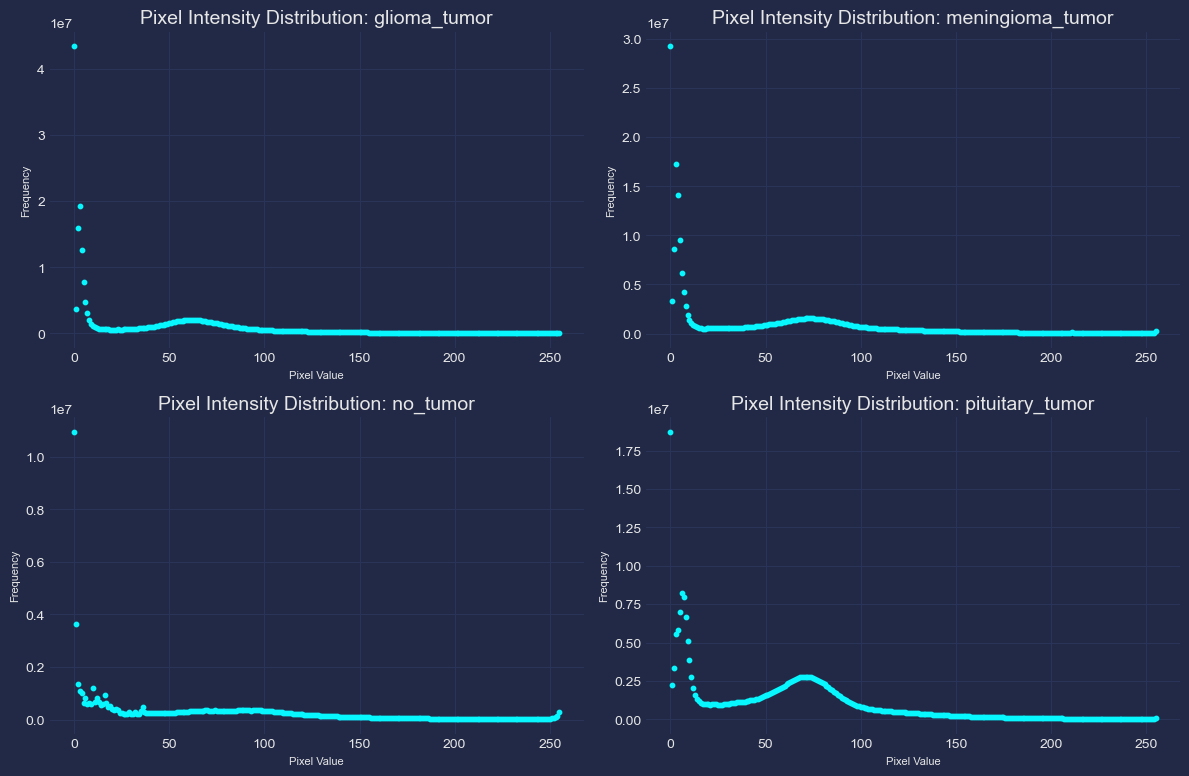

In [59]:
# Due to high frequency of low pixel value, we check which class is having more low pixel value for better understanding
# Function to get image intensity distribution
def get_image_intensity_distribution(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return np.histogram(image, bins=256, range=(0, 256))[0]

# Apply the function to get intensity distributions
data['intensity_distribution'] = data['file_path'].apply(get_image_intensity_distribution)

# Plot pixel intensity distributions for each class
class_labels = data['label'].unique()

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for ax, label in zip(axs.flat, class_labels):
    # Aggregate intensity distributions for the current class
    class_intensity_distributions = data[data['label'] == label]['intensity_distribution']
    combined_histogram = np.sum(np.stack(class_intensity_distributions.values), axis=0)

    # Plot the intensity distribution using scatter plot
    ax.scatter(range(256), combined_histogram, s=10)
    ax.set_title(f'Pixel Intensity Distribution: {label}', fontsize=14)
    ax.set_xlabel('Pixel Value', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()


# Data Preprocessing

## Resize Images

In [60]:
# # Resize the image
from tqdm import tqdm
from joblib import Parallel, delayed

# Define the resize function
def resize_image(file_path, target_size=(256, 256)):
    image = cv2.imread(file_path)
    resized_image = cv2.resize(image, target_size)
    return resized_image

# Apply parallel processing using joblib with tqdm progress bar
def parallel_resize(data, target_size=(256, 256), n_jobs=7):
    # Use tqdm to create a progress bar
    resized_images = Parallel(n_jobs=n_jobs)(
        delayed(resize_image)(file_path, target_size) for file_path in tqdm(data['file_path'], desc="Resizing images")
    )
    return resized_images

data['resized_image'] = parallel_resize(data, target_size=(256, 256))

Resizing images: 100%|███████████████████████████████████████████████████████████| 3264/3264 [00:02<00:00, 1191.98it/s]


Number of images resized: 3264



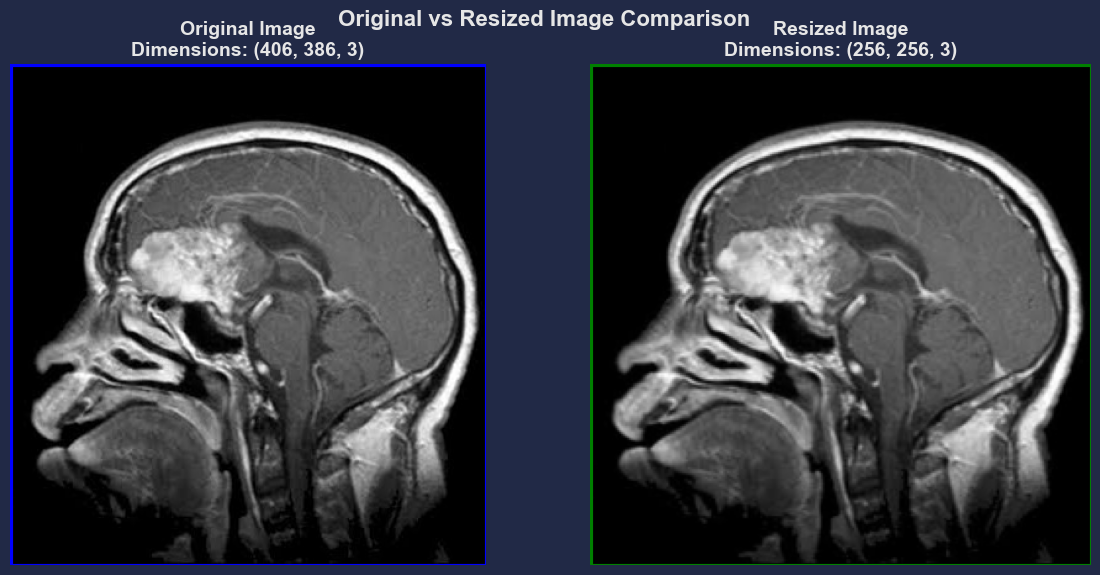

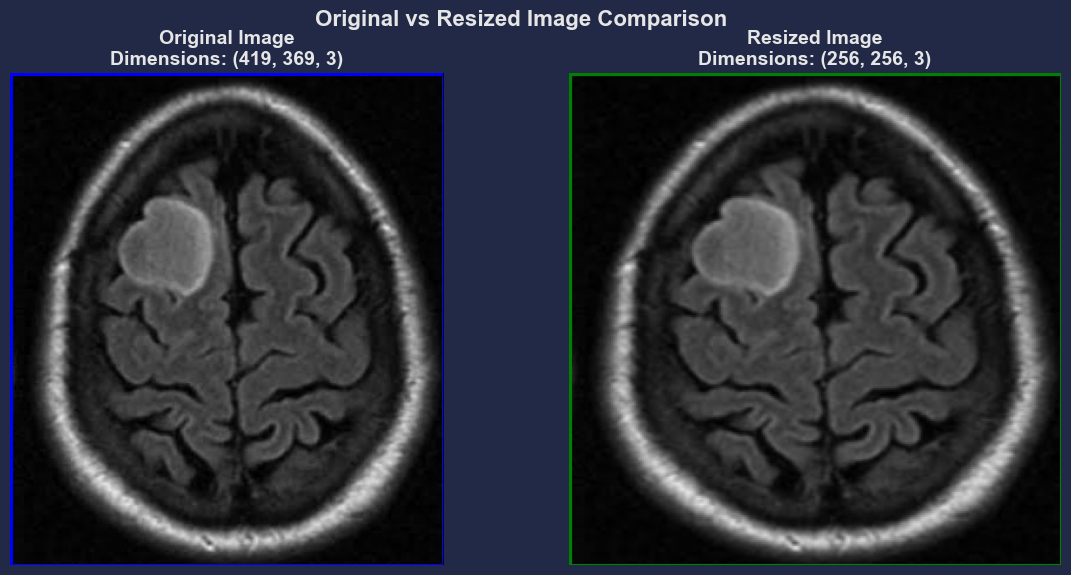

In [62]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Show how many images have been resized
num_resized_images = len(data['resized_image'])
print(f"Number of images resized: {num_resized_images}\n")

# Filter for images with significant dimension differences
significant_diff_indices = data[data['dimensions'] != (512, 512, 3)].index

# Function to display original and resized images side by side
def display_before_after_resize(index):
    file_path = data['file_path'].loc[index]
    original_image = cv2.imread(file_path)
    resized_image = data['resized_image'].loc[index]

    # Convert images from BGR (OpenCV format) to RGB (Matplotlib format)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

    # Create a figure for original and resized images
    plt.figure(figsize=(12, 6))  # Adjusted size for better display

    # Display the original image with a border
    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title(f"Original Image\nDimensions: {original_image.shape}", fontsize=14, weight='bold')
    plt.axis('off')
    plt.gca().add_patch(plt.Rectangle((0, 0), original_image_rgb.shape[1], original_image_rgb.shape[0], 
                                      edgecolor='blue', linewidth=3, fill=False))  # Adding a border

    # Display the resized image with a border
    plt.subplot(1, 2, 2)
    plt.imshow(resized_image_rgb)
    plt.title(f"Resized Image\nDimensions: {resized_image.shape}", fontsize=14, weight='bold')
    plt.axis('off')
    plt.gca().add_patch(plt.Rectangle((0, 0), resized_image_rgb.shape[1], resized_image_rgb.shape[0], 
                                      edgecolor='green', linewidth=3, fill=False))  # Adding a border

    # Add a main title to describe the figure
    plt.suptitle('Original vs Resized Image Comparison', fontsize=16, weight='bold', y=0.95)

    # Show the images
    plt.tight_layout()
    plt.show()

# Display examples for the first 3 images with significant dimension differences
for i in significant_diff_indices[:3]:
    display_before_after_resize(i)


In [63]:
# Check the size distribution
# Get dimensions of resized images
data['resized_dimensions'] = data['resized_image'].apply(lambda img: img.shape)

# Count the dimensions of resized images
resized_dimension_counts = data['resized_dimensions'].value_counts()

# Print the counts
print("Counts of resized image dimensions:")
print(resized_dimension_counts)

Counts of resized image dimensions:
resized_dimensions
(256, 256, 3)    3264
Name: count, dtype: int64


## Normalize Images

In [64]:
def normalize_image(image):
    return image / 255.0

data['normalized_image'] = data['resized_image'].apply(normalize_image)


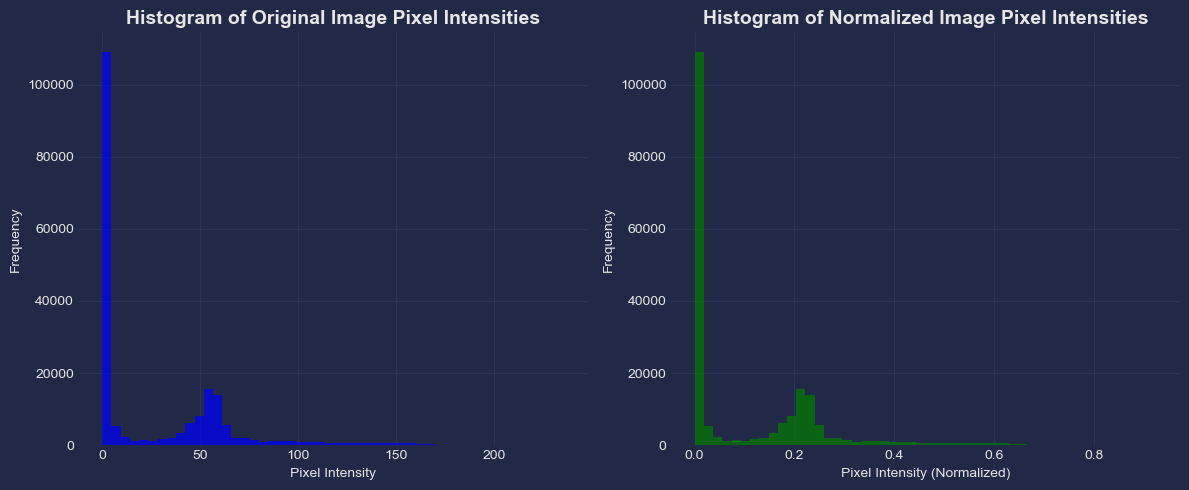

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display histogram of pixel intensities before and after normalization
def display_histogram_before_after(index):
    original_image = data['resized_image'].loc[index]
    normalized_image = data['normalized_image'].loc[index]

    # Flatten images to 1D arrays for histogram plotting
    original_pixels = original_image.flatten()
    normalized_pixels = normalized_image.flatten()

    # Plot histograms
    plt.figure(figsize=(12, 5))

    # Histogram for original image pixel intensities
    plt.subplot(1, 2, 1)
    plt.hist(original_pixels, bins=50, color='blue', alpha=0.7)
    plt.title('Histogram of Original Image Pixel Intensities', fontsize=14, weight='bold')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Histogram for normalized image pixel intensities
    plt.subplot(1, 2, 2)
    plt.hist(normalized_pixels, bins=50, color='green', alpha=0.7)
    plt.title('Histogram of Normalized Image Pixel Intensities', fontsize=14, weight='bold')
    plt.xlabel('Pixel Intensity (Normalized)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Display histogram for the first image
display_histogram_before_after(0)


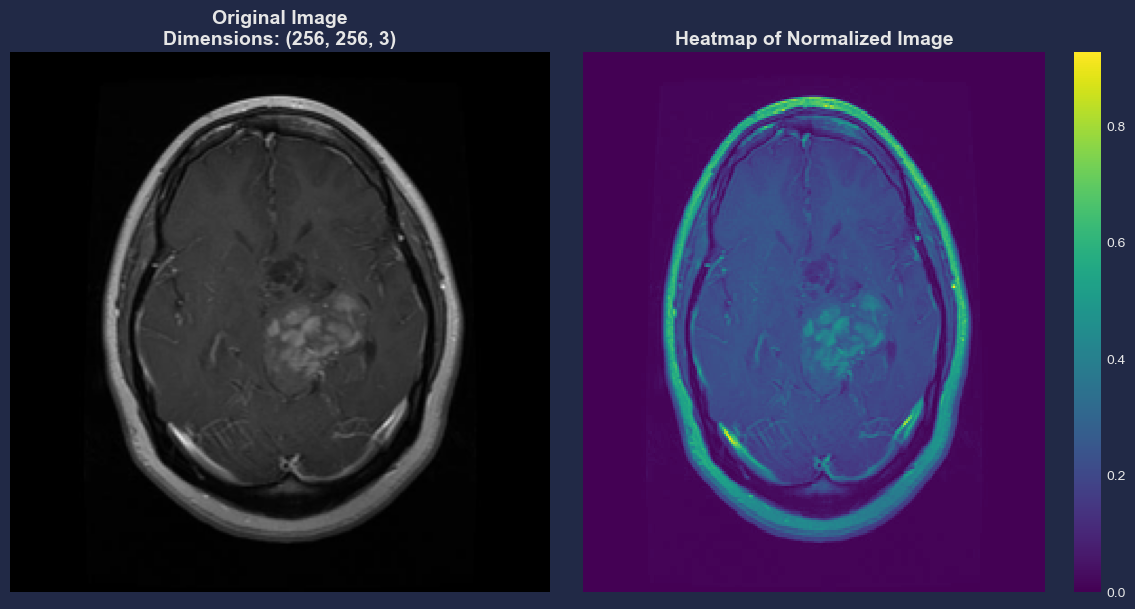

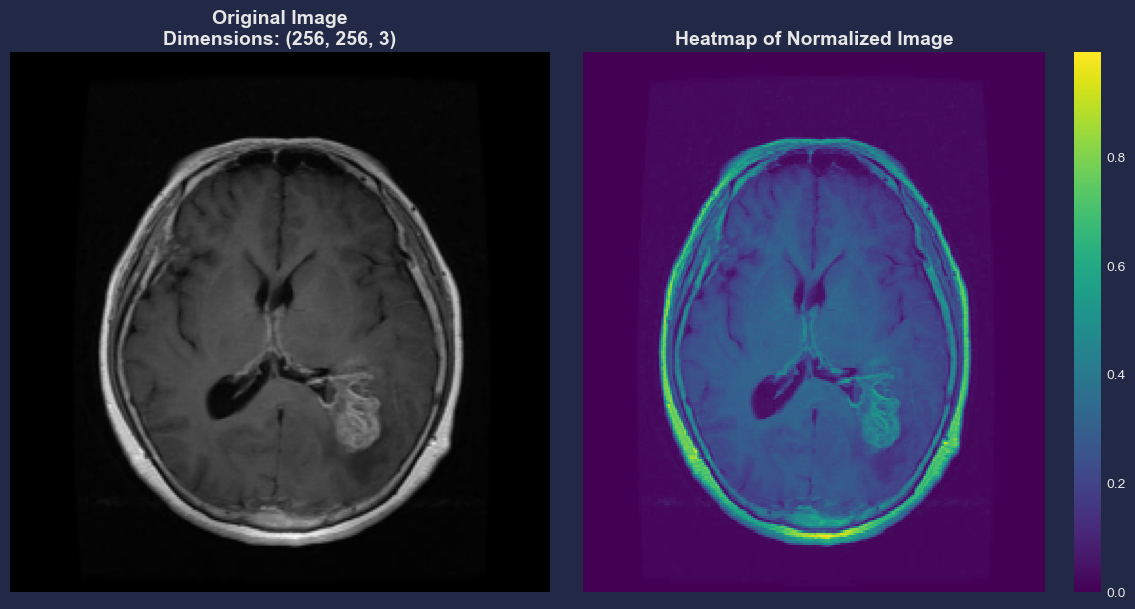

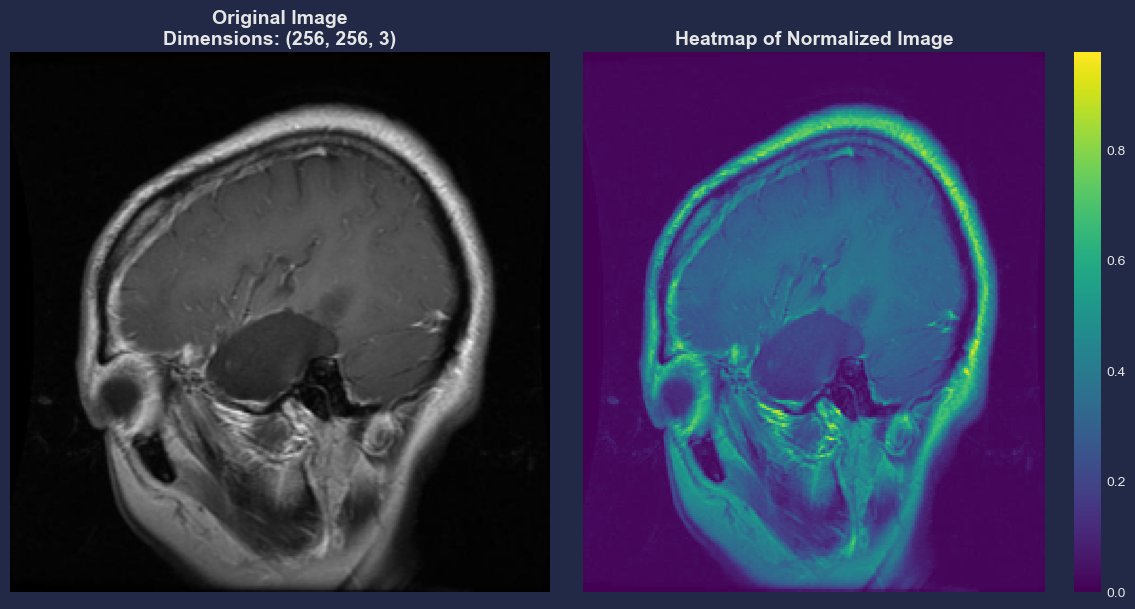

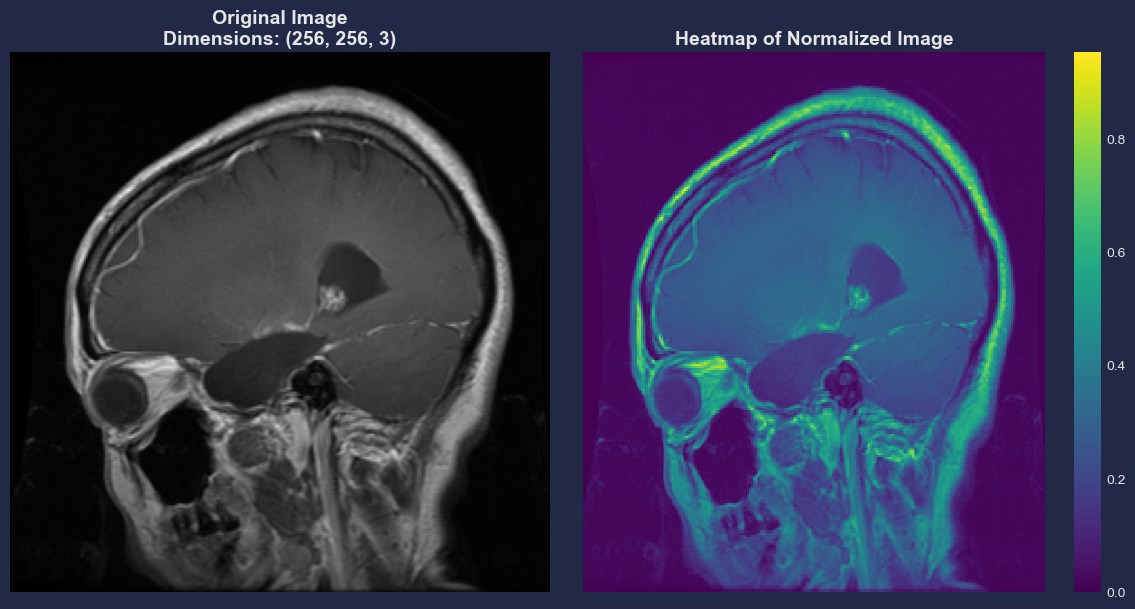

In [78]:
def display_multiple_original_vs_heatmaps(indices):
    for index in indices:
        original_image = data['resized_image'].loc[index]
        normalized_image = data['normalized_image'].loc[index]

        # Convert normalized image to grayscale
        if normalized_image.shape[-1] == 3:
            grayscale_image = np.mean(normalized_image, axis=-1)
        else:
            grayscale_image = normalized_image

        plt.figure(figsize=(12, 6))

        # Show original image
        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title(f"Original Image\nDimensions: {original_image.shape}", fontsize=14, weight='bold')
        plt.axis('off')

        # Show heatmap of normalized image
        plt.subplot(1, 2, 2)
        sns.heatmap(grayscale_image, cmap='viridis', cbar=True)
        plt.title(f"Heatmap of Normalized Image", fontsize=14, weight='bold')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

# Display original vs heatmap for multiple images
display_multiple_original_vs_heatmaps([0, 1, 2, 3])  # Pass the indices of the images you want to display


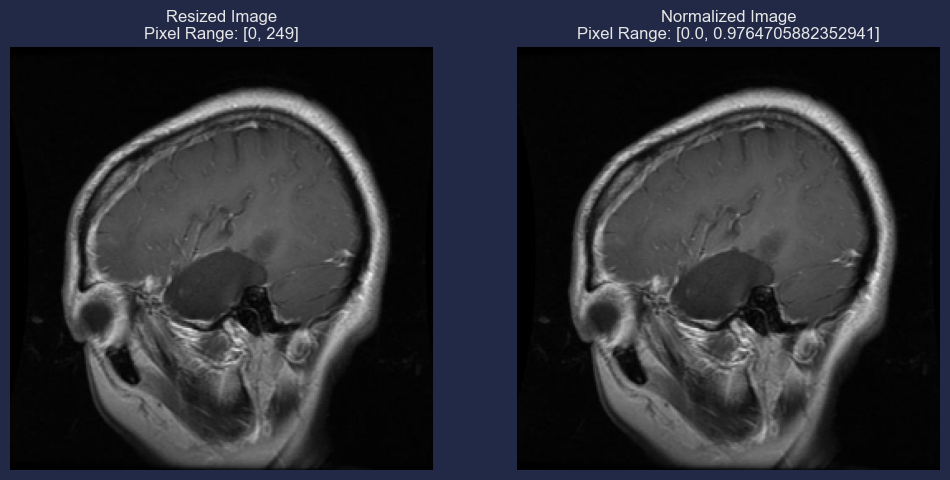

In [72]:
# Check if there is any disruption of the normalization steps
def display_before_after_normalization(index):
    resized_image = data['resized_image'].iloc[index]
    normalized_image = data['normalized_image'].iloc[index]

    # Convert resized image from BGR (OpenCV format) to RGB (Matplotlib format)
    resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

    # Convert normalized image back to 0-255 range for display purposes
    normalized_image_display = (normalized_image * 255).astype(np.uint8)

    # Plot the images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(resized_image_rgb)
    plt.title(f"Resized Image\nPixel Range: [{resized_image_rgb.min()}, {resized_image_rgb.max()}]")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(normalized_image_display)
    plt.title(f"Normalized Image\nPixel Range: [{normalized_image.min()}, {normalized_image.max()}]")
    plt.axis('off')

    plt.show()

# Display examples for the first 3 images
for i in range(3):
    display_before_after_normalization(i)


In [77]:
# Function to calculate statistics of an image
def calculate_statistics(image):
    return {
        'mean': np.mean(image),
        'std': np.std(image),
    }

# Apply the function to calculate statistics for each normalized image
data['image_statistics'] = data['normalized_image'].apply(calculate_statistics)

# Extract statistics into a DataFrame for easy manipulation
stats_df = pd.DataFrame(data['image_statistics'].tolist())

# Display overall statistics
overall_stats = {
    'mean': stats_df['mean'].mean(),
    'std': stats_df['std'].mean(),
}

print("Overall statistics of normalized images:")
print(f"Mean: {overall_stats['mean']:.4f}")
print(f"Standard Deviation: {overall_stats['std']:.4f}")



Overall statistics of normalized images:
Mean: 0.1881
Standard Deviation: 0.1793


# Class Imbalance (Oversampling Method)

In [79]:
# Show class distribution before undersampling
print("Class distribution before handling imbalance:")
print(data['label'].value_counts())


Class distribution before handling imbalance:
label
meningioma_tumor    937
glioma_tumor        926
pituitary_tumor     901
no_tumor            500
Name: count, dtype: int64


In [80]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Prepare the data for oversampling
X = np.array(data['normalized_image'].tolist())  # Convert normalized images to numpy array
y = data['label']  # Labels

# Reshape X to 2D for RandomOverSampler
X_reshaped = X.reshape(len(X), -1)

# Apply Random Oversampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_reshaped, y)

# Reshape X_resampled back to the original image shape
X_resampled = X_resampled.reshape(-1, 256, 256, 3)

# Update the DataFrame with the resampled data
data_resampled = pd.DataFrame({'normalized_image': list(X_resampled), 'label': y_resampled})
print(data_resampled['label'].value_counts())

label
no_tumor            937
pituitary_tumor     937
glioma_tumor        937
meningioma_tumor    937
Name: count, dtype: int64


In [83]:
# Show class distribution before oversampling
print("Class distribution before handling imbalance:")
print(data['label'].value_counts(), "\n")

# Import necessary libraries
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd

# Prepare the data for oversampling
X = np.array(data['normalized_image'].tolist())  # Convert normalized images to numpy array
y = data['label']  # Labels

# Reshape X to 2D for RandomOverSampler
X_reshaped = X.reshape(len(X), -1)  # Flatten the images

# Apply Random Oversampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_reshaped, y)

# Reshape X_resampled back to the original image shape
X_resampled = X_resampled.reshape(-1, 256, 256, 3)

# Update the DataFrame with the resampled data
data_resampled = pd.DataFrame({'normalized_image': list(X_resampled), 'label': y_resampled})

# Show class distribution after oversampling
print("Class distribution after oversampling:")
print(data_resampled['label'].value_counts())


Class distribution before handling imbalance:
label
meningioma_tumor    937
glioma_tumor        926
pituitary_tumor     901
no_tumor            500
Name: count, dtype: int64 

Class distribution after oversampling:
label
no_tumor            937
pituitary_tumor     937
glioma_tumor        937
meningioma_tumor    937
Name: count, dtype: int64


## Class label

In [89]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y_resampled)
data_resampled['label'] = y_encoded

# Display the mapping of numerical labels to original class labels
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Mapping of original class labels to numerical labels:")
for original_class, numeric_label in label_mapping.items():
    print(f"{original_class}: {numeric_label}")
# Optionally, verify the new labels
print("\nClass distribution after encoding:")
print(data_resampled['label'].value_counts())

Mapping of original class labels to numerical labels:
glioma_tumor: 0
meningioma_tumor: 1
no_tumor: 2
pituitary_tumor: 3

Class distribution after encoding:
label
0    937
1    937
2    937
3    937
Name: count, dtype: int64


## One-hot encoded

In [90]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_one_hot = to_categorical(data_resampled['label'], num_classes=len(le.classes_))

# Verify the shape of the one-hot encoded labels
print("Shape of one-hot encoded labels:", y_one_hot.shape)


Shape of one-hot encoded labels: (3748, 4)


In [98]:
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Assuming 'y_resampled' contains the labels after oversampling

# Encode the original labels to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y_resampled)  # Numerical encoding of labels

# One-hot encode the numerical labels
y_one_hot = to_categorical(y_encoded, num_classes=len(le.classes_))

# Convert the one-hot encoded array into a DataFrame with column names
one_hot_df = pd.DataFrame(y_one_hot, columns=[f'class_{i}' for i in range(y_one_hot.shape[1])])

# Combine the original labels, numerical encoding, and one-hot encoded columns into one DataFrame
data_combined = pd.DataFrame({
    'original_label': y_resampled,  # Original labels
    'numeric_label': y_encoded  # Numeric encoded labels
})

# Concatenate the one-hot encoded columns
data_combined = pd.concat([data_combined, one_hot_df], axis=1)

# Display the first few rows of the DataFrame
print(data_combined)


       original_label  numeric_label  class_0  class_1  class_2  class_3
0        glioma_tumor              0      1.0      0.0      0.0      0.0
1        glioma_tumor              0      1.0      0.0      0.0      0.0
2        glioma_tumor              0      1.0      0.0      0.0      0.0
3        glioma_tumor              0      1.0      0.0      0.0      0.0
4        glioma_tumor              0      1.0      0.0      0.0      0.0
...               ...            ...      ...      ...      ...      ...
3743  pituitary_tumor              3      0.0      0.0      0.0      1.0
3744  pituitary_tumor              3      0.0      0.0      0.0      1.0
3745  pituitary_tumor              3      0.0      0.0      0.0      1.0
3746  pituitary_tumor              3      0.0      0.0      0.0      1.0
3747  pituitary_tumor              3      0.0      0.0      0.0      1.0

[3748 rows x 6 columns]


## Data Splitting

In [102]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical

# Convert the normalized images to a numpy array
X = np.array(data_resampled['normalized_image'].tolist())

# One-hot encode the labels
y_one_hot = to_categorical(data_resampled['label'], num_classes=len(le.classes_))

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size (X): {X_train.shape}")
print(f"Testing set size (X): {X_test.shape}")
print(f"Training set size (y): {y_train.shape}")
print(f"Testing set size (y): {y_test.shape}")


Training set size (X): (2998, 256, 256, 3)
Testing set size (X): (750, 256, 256, 3)
Training set size (y): (2998, 4)
Testing set size (y): (750, 4)


# Data Augmentation Setup

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# CNN-Base

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(len(le.classes_), activation='softmax')  # Adjust the number of output classes
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
cnn_model.summary()





C:\Users\davej\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      58,982,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,208,516 (225.86 MB)

 Trainable params: 59,208,516 (225.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


# Train the model using the data augmentation generator
history_cnn = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50


C:\Users\davej\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.3394 - loss: 1.3834 - val_accuracy: 0.5120 - val_loss: 1.1870
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.4684 - loss: 1.2067 - val_accuracy: 0.5920 - val_loss: 1.0488
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.5633 - loss: 1.0586 - val_accuracy: 0.5160 - val_loss: 1.1693
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.6009 - loss: 0.9979 - val_accuracy: 0.6413 - val_loss: 0.8919
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.5906 - loss: 0.9951 - val_accuracy: 0.6880 - val_loss: 0.8432
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.6425 - loss: 0.8943 - val_accuracy: 0.6187 - val_loss: 0.9517
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.6574 - loss: 0.8667 - val_accuracy: 0.7093 - val_loss: 0.7250
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.6531 - loss: 0.8626 - val_accuracy: 0.5867 - val_loss: 1.

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model on the training data
train_loss, train_accuracy = cnn_model.evaluate(X_train, y_train, verbose=0)

# Evaluate the model on the testing data
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)

# Print training and testing metrics together
print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}")

Training Loss: 0.2949, Training Accuracy: 0.8946
Testing Loss: 0.4294, Testing Accuracy: 0.8760


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict the classes for the test set
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # True class labels from one-hot encoded format
# Generate the confusion matrix
cnn_cm = confusion_matrix(y_true, y_pred_classes)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# If not already done, predict the classes for the test set
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # True class labels from one-hot encoded format

# Generate the classification report
report = classification_report(y_true, y_pred_classes, target_names=le.classes_)
print("Classification Report:")
print(report)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step
Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.94      0.79      0.86       207
meningioma_tumor       0.79      0.83      0.81       188
        no_tumor       0.92      0.93      0.93       180
 pituitary_tumor       0.87      0.98      0.92       175

        accuracy                           0.88       750
       macro avg       0.88      0.88      0.88       750
    weighted avg       0.88      0.88      0.88       750



# CNN-Hyperparameter Tuning

In [ ]:
# type: ignore
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch 

class CNNHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

        # Convolutional layers
        model.add(Conv2D(filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32),
                         kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
                         activation='relu',
                         input_shape=(256, 256, 3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=32),
                         kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
                         activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=32),
                         kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
                         activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())

        # Dense layers
        model.add(Dense(units=hp.Int('dense_1_units', min_value=128, max_value=512, step=128),
                        activation='relu'))
        model.add(Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))

        model.add(Dense(units=hp.Int('dense_2_units', min_value=128, max_value=512, step=128),
                        activation='relu'))
        model.add(Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))

        model.add(Dense(len(le.classes_), activation='softmax'))  # Adjust the number of output classes

        model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        return model

# Instantiate the hypermodel
hypermodel = CNNHyperModel()

# Instantiate the tuner and perform hypertuning
tuner = RandomSearch(hypermodel,
                     objective='val_accuracy',
                     max_trials=10,  # number of different models to try
                     executions_per_trial=1,  # number of times to train each model
                     directory='hyperparameter_tuning',
                     project_name='cnn_tuning')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(datagen.flow(X_train, y_train, batch_size=32),
             validation_data=(X_test, y_test),
             epochs=10,
            callbacks=[early_stopping])  




Reloading Tuner from hyperparameter_tuning/cnn_tuning/tuner0.json


In [ ]:
tuner.reload()
# Get the optimal hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f'''
The hyperparameter search is complete. Here are the best hyperparameters:
- Filters in the first Conv1D layer: {best_hyperparameters.get('conv_1_filter')}
- Kernel size in the first Conv1D layer: {best_hyperparameters.get('conv_1_kernel')}
- Filters in the second Conv1D layer: {best_hyperparameters.get('conv_2_filter')}
- Kernel size in the second Conv1D layer: {best_hyperparameters.get('conv_2_kernel')}
- Filters in the third Conv1D layer: {best_hyperparameters.get('conv_3_filter')}
- Kernel size in the third Conv1D layer: {best_hyperparameters.get('conv_3_kernel')}
- Dropout rate: {best_hyperparameters.get('dropout_rate')}
- Learning rate: {best_hyperparameters.get('learning_rate')}
''')

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hyperparameters)

# Train the best model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=50)

# Plot training and validation metrics
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}")





The hyperparameter search is complete. Here are the best hyperparameters:
- Filters in the first Conv1D layer: 128
- Kernel size in the first Conv1D layer: 3
- Filters in the second Conv1D layer: 96
- Kernel size in the second Conv1D layer: 3
- Filters in the third Conv1D layer: 128
- Kernel size in the third Conv1D layer: 3
- Dropout rate: 0.30000000000000004
- Learning rate: 0.00045735691792677167



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1724675469.543285    1000 service.cc:146] XLA service 0x771e8000f250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724675469.543360    1000 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-08-26 12:31:09.673733: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-26 12:31:10.022067: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906


 1/94 ━━━━━━━━━━━━━━━━━━━━ 16:18 11s/step - accuracy: 0.2812 - loss: 1.3925

I0000 00:00:1724675475.847365    1000 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


93/94 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.2741 - loss: 1.4763

2024-08-26 12:31:52.601098: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_98', 8 bytes spill stores, 8 bytes spill loads



94/94 ━━━━━━━━━━━━━━━━━━━━ 49s 412ms/step - accuracy: 0.2749 - loss: 1.4742 - val_accuracy: 0.4520 - val_loss: 1.2652
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 284ms/step - accuracy: 0.4355 - loss: 1.2735 - val_accuracy: 0.5387 - val_loss: 1.1479
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 282ms/step - accuracy: 0.4963 - loss: 1.1756 - val_accuracy: 0.5267 - val_loss: 1.1811
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 0.5653 - loss: 1.0487 - val_accuracy: 0.4680 - val_loss: 1.2433
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.5484 - loss: 1.0610 - val_accuracy: 0.6880 - val_loss: 0.8493
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 282ms/step - accuracy: 0.6217 - loss: 0.9069 - val_accuracy: 0.6453 - val_loss: 0.9375
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 285ms/step - accuracy: 0.6606 - loss: 0.8412 - val_accuracy: 0.6707 - val_loss: 0.8176
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 287ms/step - accuracy: 0.6363 - loss: 0.8834 - val_accuracy: 0.700

Training Loss: 0.3934, Training Accuracy: 0.8426
Testing Loss: 0.4976, Testing Accuracy: 0.8160


In [ ]:
# type: ignore
from sklearn.metrics import classification_report
import numpy as np

# If not already done, predict the classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # True class labels from one-hot encoded format

# Generate the classification report
tune_cnn_report = classification_report(y_true, y_pred_classes, target_names=le.classes_)
print("Classification Report:")
print(tune_cnn_report)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.75      0.89      0.81       207
meningioma_tumor       0.81      0.46      0.59       188
        no_tumor       0.87      0.92      0.90       180
 pituitary_tumor       0.85      0.99      0.92       175

        accuracy                           0.82       750
       macro avg       0.82      0.82      0.80       750
    weighted avg       0.82      0.82      0.80       750



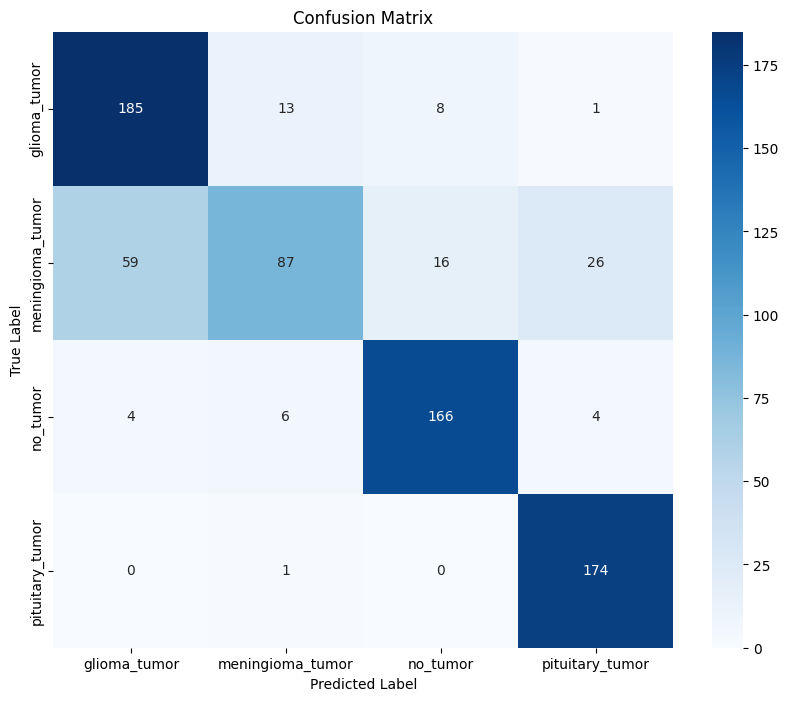

In [ ]:
# type: ignore

from sklearn.metrics import confusion_matrix
tune_cnn_cm = confusion_matrix(y_true, y_pred_classes)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(tune_cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# RNN-LSTM Base

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, BatchNormalization,SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

# Example input shape for sequential data
timesteps = 256  # Number of timesteps (height of the image)
input_dim = 256 * 3  # Number of features per timestep (width * channels)

# Define the LSTM model
lstm_model = Sequential([
    Reshape((timesteps, input_dim), input_shape=(256, 256, 3)),  # Reshape the image into a sequence

    LSTM(128, return_sequences=True, dropout=0.3),  # First LSTM layer
    BatchNormalization(),

    LSTM(64, return_sequences=False, dropout=0.3),  # Second LSTM layer
    BatchNormalization(),

    Dense(256, activation='relu'),  # Fully connected layer
    Dropout(0.4),

    Dense(128, activation='relu'),  # Second fully connected layer
    Dropout(0.4),

    Dense(len(le.classes_), activation='softmax')  # Output layer with softmax for multi-class classification
])


# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Print the model summary
lstm_model.summary()



C:\Users\davej\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_7 (Reshape)                  │ (None, 256, 768)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 256, 128)            │         459,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 256, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559,492 (2.13 MB)

 Trainable params: 559,108 (2.13 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Train the LSTM model with early stopping
history_lstm = lstm_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 42s 325ms/step - accuracy: 0.3000 - loss: 1.4831 - val_accuracy: 0.4133 - val_loss: 1.3183
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 279ms/step - accuracy: 0.4719 - loss: 1.2063 - val_accuracy: 0.4773 - val_loss: 1.2329
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 274ms/step - accuracy: 0.5099 - loss: 1.1391 - val_accuracy: 0.5267 - val_loss: 1.1401
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 279ms/step - accuracy: 0.5573 - loss: 1.0245 - val_accuracy: 0.5747 - val_loss: 1.0374
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 279ms/step - accuracy: 0.5672 - loss: 0.9983 - val_accuracy: 0.6427 - val_loss: 0.9220
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 282ms/step - accuracy: 0.6091 - loss: 0.9433 - val_accuracy: 0.6387 - val_loss: 0.8864
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 300ms/step - accuracy: 0.6209 - loss: 0.9317 - val_accuracy: 0.6693 - val_loss: 0.8245
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 277ms/step - accuracy: 0.6555 - loss: 0.8489 - val_accu

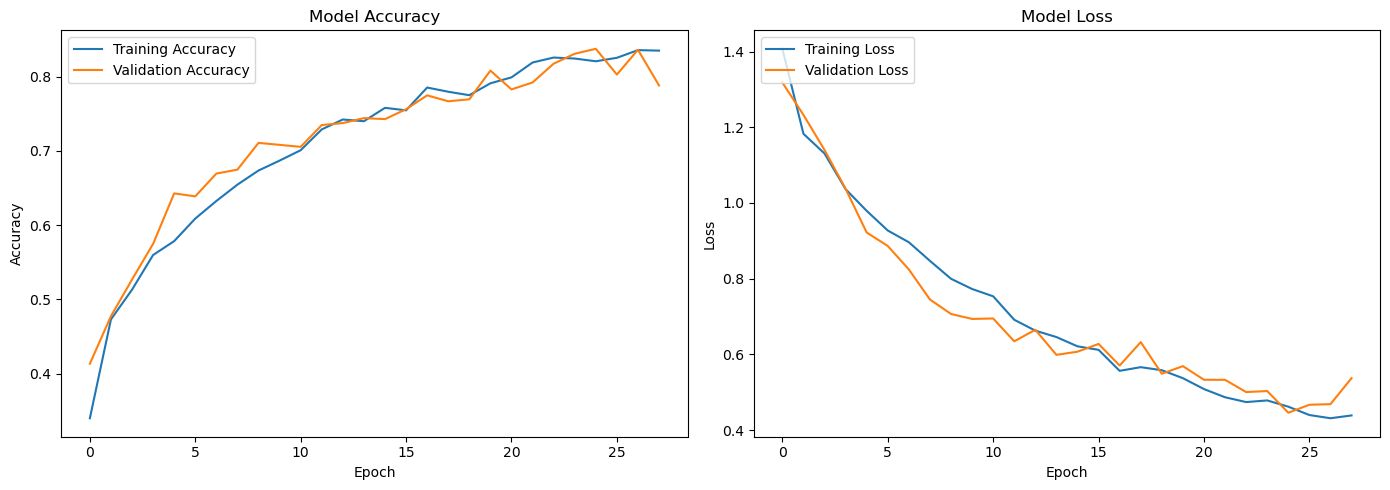

Training Loss: 0.3343, Training Accuracy: 0.8686
Testing Loss: 0.4457, Testing Accuracy: 0.8373


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model on the training data
train_loss, train_accuracy = lstm_model.evaluate(X_train, y_train, verbose=0)

# Evaluate the model on the testing data
test_loss, test_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)

# Print training and testing metrics together
print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict the classes for the test set
y_pred = lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # True class labels from one-hot encoded format
# Generate the confusion matrix
lstm_cm = confusion_matrix(y_true, y_pred_classes)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step


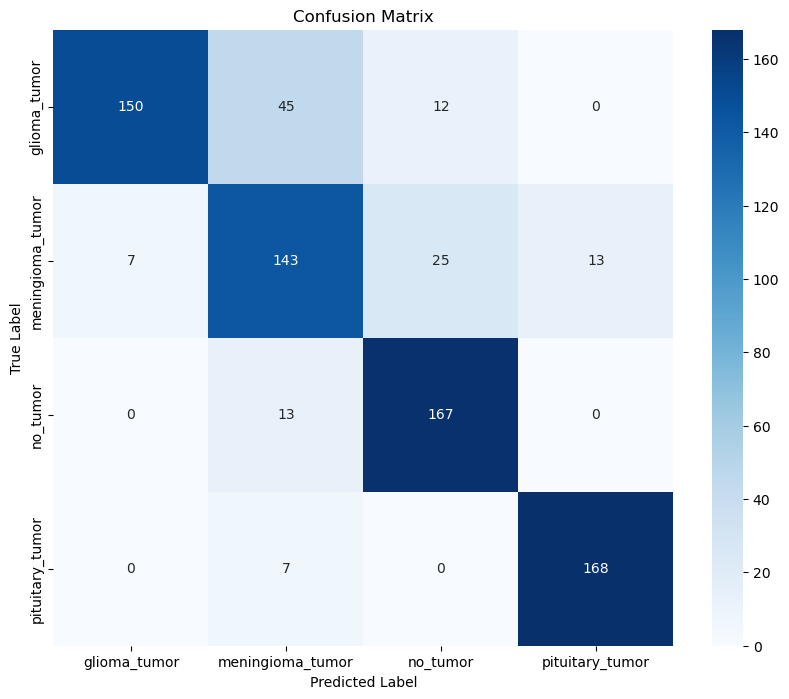

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# If not already done, predict the classes for the test set
y_pred = lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # True class labels from one-hot encoded format

# Generate the classification report
lstm_report = classification_report(y_true, y_pred_classes, target_names=le.classes_)
print("Classification Report:")
print(lstm_report)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step
Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.96      0.72      0.82       207
meningioma_tumor       0.69      0.76      0.72       188
        no_tumor       0.82      0.93      0.87       180
 pituitary_tumor       0.93      0.96      0.94       175

        accuracy                           0.84       750
       macro avg       0.85      0.84      0.84       750
    weighted avg       0.85      0.84      0.84       750



# RNN-LSTM - Hyperparameter Tuning

In [ ]:
!pip install keras-tuner
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from tensorflow.keras.layers import Reshape

class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Reshape((256, 256 * 3), input_shape=(256, 256, 3)))
        # First LSTM layer
        model.add(LSTM(units=hp.Int('units_lstm_1', min_value=32, max_value=256, step=32),
                       return_sequences=True))  # Adjust input_shape based on your data
        model.add(Dropout(hp.Float('dropout_lstm_1', min_value=0.1, max_value=0.5, step=0.1)))
        model.add(BatchNormalization())

        # Second LSTM layer
        model.add(LSTM(units=hp.Int('units_lstm_2', min_value=32, max_value=256, step=32)))
        model.add(Dropout(hp.Float('dropout_lstm_2', min_value=0.1, max_value=0.5, step=0.1)))
        model.add(BatchNormalization())

        # Dense layer
        model.add(Dense(units=hp.Int('units_dense', min_value=32, max_value=256, step=32), activation='relu'))
        model.add(Dropout(hp.Float('dropout_dense', min_value=0.1, max_value=0.5, step=0.1)))

        # Output layer
        model.add(Dense(len(le.classes_), activation='softmax'))  # Adjust number of units based on your classes

        # Compile the model with a tunable learning rate
        model.compile(
            optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Instantiate the hypermodel
hypermodel = LSTMHyperModel()

# Instantiate the tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,  # Number of different models to try
    executions_per_trial=2,  # Number of times to train each model
    directory='hyperparameter_tuning',
    project_name='lstm_tuning'
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=1e-5)

# Create tf.data.Dataset for better performance
batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Search for the best hyperparameters
tuner.search(
    train_dataset,
    validation_data=test_dataset,
    epochs=10,
    callbacks=[early_stopping, reduce_lr]
)



Reloading Tuner from hyperparameter_tuning/lstm_tuning/tuner0.json


In [ ]:
# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f'''
The hyperparameter search is complete. Here are the best hyperparameters:
- Units in the first LSTM layer: {best_hyperparameters.get('units_lstm_1')}
- Dropout rate for the first LSTM layer: {best_hyperparameters.get('dropout_lstm_1')}
- Units in the second LSTM layer: {best_hyperparameters.get('units_lstm_2')}
- Dropout rate for the second LSTM layer: {best_hyperparameters.get('dropout_lstm_2')}
- Units in the Dense layer: {best_hyperparameters.get('units_dense')}
- Dropout rate for the Dense layer: {best_hyperparameters.get('dropout_dense')}
- Learning rate: {best_hyperparameters.get('learning_rate')}
''')

# Build the best model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparameters)

# Train the best model
history = best_model.fit(
    train_dataset,  # Use the tf.data.Dataset
    validation_data=test_dataset,  # Use the tf.data.Dataset
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)
# Save the model
best_model.save('vastai_best_lstm2_model.h5')


The hyperparameter search is complete. Here are the best hyperparameters:
- Units in the first LSTM layer: 192
- Dropout rate for the first LSTM layer: 0.2
- Units in the second LSTM layer: 64
- Dropout rate for the second LSTM layer: 0.2
- Units in the Dense layer: 224
- Dropout rate for the Dense layer: 0.30000000000000004
- Learning rate: 0.0003106421820985116

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.3680 - loss: 1.3707 - val_accuracy: 0.3667 - val_loss: 1.3372 - learning_rate: 3.1064e-04
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.5119 - loss: 1.1248 - val_accuracy: 0.4560 - val_loss: 1.2533 - learning_rate: 3.1064e-04
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.5748 - loss: 1.0104 - val_accuracy: 0.4733 - val_loss: 1.1925 - learning_rate: 3.1064e-04
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.6168 - loss: 0.9319 - val_accuracy: 0.5547 - val_loss: 1.0896 - learning_rate: 3.1064e-04
Epoch 5/50
4

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Evaluate the model on the training data
train_loss, train_accuracy = best_model.evaluate(train_dataset, verbose=0)

# Evaluate the model on the testing data
test_loss, test_accuracy = best_model.evaluate(test_dataset, verbose=0)

print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}")

# Generate predictions for the test dataset
y_pred_classes = np.argmax(best_model.predict(test_dataset), axis=-1)

# Extract true labels from test_dataset
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_true = np.argmax(y_true, axis=-1)  # If y_true is one-hot encoded

# Generate the classification report
classification_report_result = classification_report(y_true, y_pred_classes, target_names=le.classes_)
print("Classification Report:")
print(classification_report_result)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Training Loss: 0.2963, Training Accuracy: 0.8886
Testing Loss: 0.4675, Testing Accuracy: 0.8253
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.84      0.71      0.77       207
meningioma_tumor       0.69      0.77      0.73       188
        no_tumor       0.87      0.93      0.90       180
 pituitary_tumor       0.92      0.93      0.92       175

        accuracy                           0.83       750
       macro avg       0.83      0.83      0.83       750
    weighted avg       0.83      0.83      0.82       750



# DNN-Base

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# DNN model 2
dnn_model = Sequential([
    Flatten(input_shape=(256, 256, 3)),  # Flatten the input image
    Dense(1024, activation='relu'),  # First dense layer with 1024 units
    BatchNormalization(),
    Dropout(0.4),  # Dropout for regularization
    Dense(512, activation='relu'),  # Second dense layer with 512 units
    BatchNormalization(),
    Dropout(0.4),  # Dropout for regularization
    Dense(256, activation='relu'),  # Third dense layer with 256 units
    BatchNormalization(),
    Dropout(0.4),  # Dropout for regularization
    Dense(128, activation='relu'),  # Fourth dense layer with 128 units
    BatchNormalization(),
    Dropout(0.4),  # Dropout for regularization
    Dense(len(le.classes_), activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
dnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=0.00001)

# Print the model summary
dnn_model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1024)           │   201,327,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,024,836 (770.66 MB)

 Trainable params: 202,020,996 (770.65 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [ ]:
# Train the DNN model with early stopping and learning rate reduction
history_dnn = dnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping,reduce_lr])


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - accuracy: 0.3835 - loss: 1.8293 - val_accuracy: 0.2907 - val_loss: 1.8529 - learning_rate: 1.0000e-04
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5180 - loss: 1.3801 - val_accuracy: 0.6133 - val_loss: 0.9725 - learning_rate: 1.0000e-04
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5898 - loss: 1.1816 - val_accuracy: 0.6933 - val_loss: 0.8059 - learning_rate: 1.0000e-04
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6230 - loss: 1.0686 - val_accuracy: 0.7493 - val_loss: 0.7324 - learning_rate: 1.0000e-04
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6479 - loss: 0.9708 - val_accuracy: 0.7227 - val_loss: 0.7446 - learning_rate: 1.0000e-04
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6668 - loss: 0.9280 - val_accuracy: 0.7147 - val_loss: 0.7167 - learning_rate: 1.0000e-04
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.685

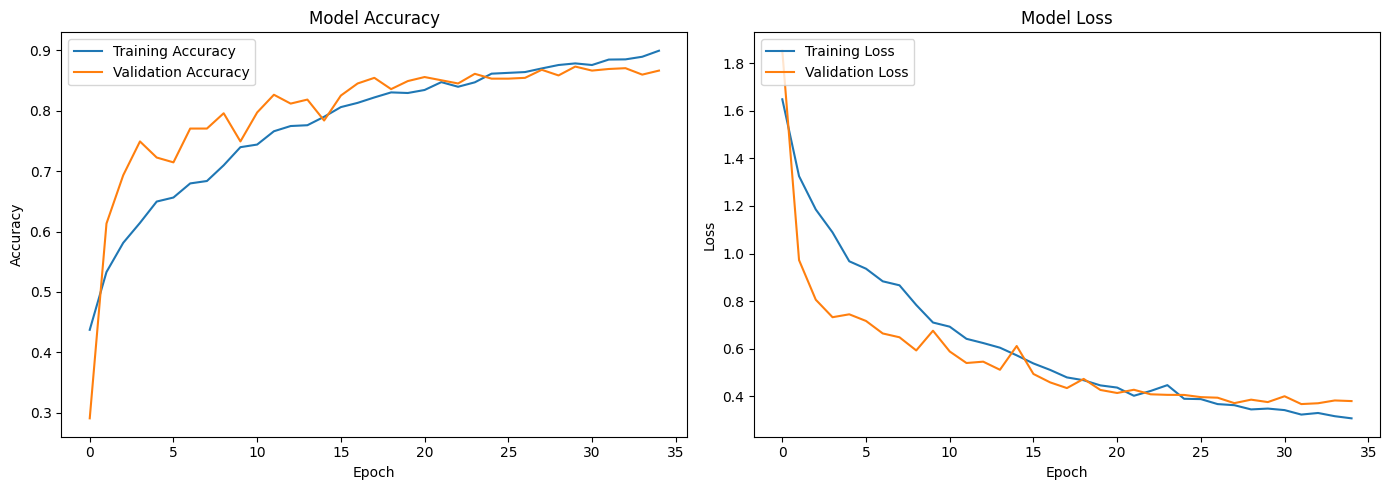

Training Loss: 0.1193, Training Accuracy: 0.9673
Testing Loss: 0.3755, Testing Accuracy: 0.8733


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dnn.history['loss'], label='Training Loss')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model on the training data
train_loss, train_accuracy = dnn_model.evaluate(X_train, y_train, verbose=0)

# Evaluate the model on the testing data
test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)

# Print training and testing metrics together
print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict the classes for the test set
y_pred = dnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # True class labels from one-hot encoded format
# Generate the confusion matrix
dnn_cm = confusion_matrix(y_true, y_pred_classes)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# If not already done, predict the classes for the test set
y_pred = dnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # True class labels from one-hot encoded format

# Generate the classification report
dnn_report = classification_report(y_true, y_pred_classes, target_names=le.classes_)
print("Classification Report:")
print(dnn_report)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.83      0.83      0.83       207
meningioma_tumor       0.81      0.78      0.79       188
        no_tumor       0.91      0.93      0.92       180
 pituitary_tumor       0.96      0.97      0.96       175

        accuracy                           0.87       750
       macro avg       0.88      0.88      0.88       750
    weighted avg       0.87      0.87      0.87       750



# DNN-Hyperparameter Tuning

In [ ]:
!pip install keras-tuner
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import mixed_precision


# Set up mixed precision training
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

class DNNHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

        # Add Flatten layer
        model.add(Flatten(input_shape=(256, 256, 3)))  # Adjust input shape based on your dataset

        # Fixed number of Dense layers
        num_dense_layers = 3  # You can set this to any fixed number of layers

        for i in range(num_dense_layers):
            model.add(Dense(units=hp.Int(f'dense_{i+1}_units', min_value=64, max_value=512, step=64),
                            activation='relu'))
            model.add(Dropout(hp.Float(f'dropout_{i+1}', min_value=0.2, max_value=0.5, step=0.1)))

        # Output layer
        model.add(Dense(len(le.classes_), activation='softmax'))  # Adjust number of units based on your classes

        # Compile the model with tunable learning rate
        model.compile(
            optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


/tmp/ipykernel_451/2153988082.py:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [ ]:
# Instantiate the hypermodel
hypermodel = DNNHyperModel()

# Instantiate the tuner and perform hyperparameter tuning
tuner = RandomSearch(hypermodel,
                     objective='val_accuracy',
                     max_trials=10,  # number of different models to try
                     executions_per_trial=2,  # number of times to train each model
                     directory='hyperparameter_tuning',
                     project_name='dnn_tuning')

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=0.00001)

# Use a suitable batch size
batch_size = 64

# Create tf.data.Dataset for better performance
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Search for the best hyperparameters
tuner.search(train_dataset,
             validation_data=test_dataset,
             epochs=10,
             callbacks=[early_stopping, reduce_lr])

2024-08-27 05:05:34.757486: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22066 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:41:00.0, compute capability: 8.9


Reloading Tuner from hyperparameter_tuning/dnn_tuning/tuner0.json


In [ ]:
# Get the optimal hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f'''
The hyperparameter search is complete. Here are the best hyperparameters:
- Units in Dense layer 1: {best_hyperparameters.get('dense_1_units')}
- Dropout rate for Dense layer 1: {best_hyperparameters.get('dropout_1')}
- Units in Dense layer 2: {best_hyperparameters.get('dense_2_units')}
- Dropout rate for Dense layer 2: {best_hyperparameters.get('dropout_2')}
- Units in Dense layer 3: {best_hyperparameters.get('dense_3_units')}
- Dropout rate for Dense layer 3: {best_hyperparameters.get('dropout_3')}
- Learning rate: {best_hyperparameters.get('learning_rate')}
''')

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparameters)

# Train the best model
history = best_model.fit(train_dataset,
                         validation_data=test_dataset,
                         epochs=50,
                         callbacks=[early_stopping, reduce_lr])

# Plot training and validation metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model on the training data
train_loss, train_accuracy = best_model.evaluate(X_train, y_train, verbose=0)

# Evaluate the model on the testing data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}")

# Save the model
best_model.save('vastai_best_dnn_model.h5')



The hyperparameter search is complete. Here are the best hyperparameters:
- Units in Dense layer 1: 256
- Dropout rate for Dense layer 1: 0.30000000000000004
- Units in Dense layer 2: 512
- Dropout rate for Dense layer 2: 0.2
- Units in Dense layer 3: 384
- Dropout rate for Dense layer 3: 0.30000000000000004
- Learning rate: 0.00014110734251095424



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


I0000 00:00:1724735165.823456     889 service.cc:146] XLA service 0x7fbcd4003d50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724735165.823523     889 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-08-27 05:06:05.894425: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-27 05:06:06.119171: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8906


 4/47 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.2324 - loss: 2.0488

I0000 00:00:1724735170.166293     889 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/47 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.2930 - loss: 2.3641

2024-08-27 05:06:15.398619: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1604', 8 bytes spill stores, 8 bytes spill loads



47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.2937 - loss: 2.3568

2024-08-27 05:06:22.314677: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_51', 4 bytes spill stores, 4 bytes spill loads

2024-08-27 05:06:22.839424: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_67', 4 bytes spill stores, 4 bytes spill loads

2024-08-27 05:06:23.017537: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_67', 4 bytes spill stores, 4 bytes spill loads

2024-08-27 05:06:27.318944: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_51', 4 bytes spill stores, 4 bytes spill loads

2024-08-27 05:06:27.614578: I external/local_xla/xla/stream_executor/cuda/cu

47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 473ms/step - accuracy: 0.2943 - loss: 2.3498 - val_accuracy: 0.3933 - val_loss: 1.2131 - learning_rate: 1.4111e-04
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.4311 - loss: 1.2258 - val_accuracy: 0.5160 - val_loss: 1.0737 - learning_rate: 1.4111e-04
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.4965 - loss: 1.1082 - val_accuracy: 0.6160 - val_loss: 0.9443 - learning_rate: 1.4111e-04
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5537 - loss: 1.0017 - val_accuracy: 0.6960 - val_loss: 0.7799 - learning_rate: 1.4111e-04
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6076 - loss: 0.8958 - val_accuracy: 0.6987 - val_loss: 0.8093 - learning_rate: 1.4111e-04
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6076 - loss: 0.8823 - val_accuracy: 0.7013 - val_loss: 0.7096 - learning_rate: 1.4111e-04
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6335 - loss: 0

2024-08-27 05:08:54.020676: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_49', 4 bytes spill stores, 4 bytes spill loads

2024-08-27 05:08:54.144642: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_49', 8 bytes spill stores, 8 bytes spill loads

2024-08-27 05:08:54.455634: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 12 bytes spill stores, 12 bytes spill loads

2024-08-27 05:08:58.427434: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_49', 4 bytes spill stores, 4 bytes spill loads

2024-08-27 05:08:59.127672: I external/local_xla/xla/stream_executor/cuda/

Training Loss: 0.3764, Training Accuracy: 0.8589
Testing Loss: 0.5223, Testing Accuracy: 0.8013


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# If not already done, predict the classes for the test set
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # True class labels from one-hot encoded format

# Generate the classification report
tune_dnn_report = classification_report(y_true, y_pred_classes, target_names=le.classes_)
print("Classification Report:")
print(tune_dnn_report)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.77      0.71      0.74       207
meningioma_tumor       0.68      0.62      0.65       188
        no_tumor       0.82      0.94      0.88       180
 pituitary_tumor       0.93      0.96      0.94       175

        accuracy                           0.80       750
       macro avg       0.80      0.81      0.80       750
    weighted avg       0.80      0.80      0.80       750



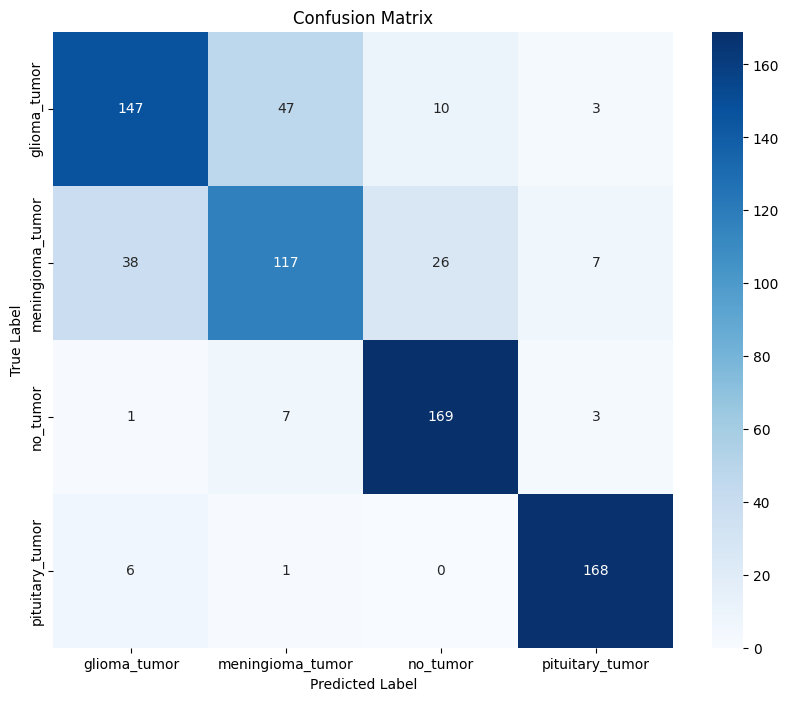

In [ ]:
from sklearn.metrics import confusion_matrix
tune_dnn_cm = confusion_matrix(y_true, y_pred_classes)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(tune_dnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()